<a href="https://colab.research.google.com/github/AenimaLabs/TelecomX2/blob/main/TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

##Cargando CSV

In [41]:
import pandas as pd

ruta = 'https://raw.githubusercontent.com/AenimaLabs/TelecomX2/refs/heads/main/df_clean.csv'
df = pd.read_csv(ruta)

In [42]:
df.head()

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27,4
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80,2


In [43]:
df.columns

Index(['ID_Cliente', 'Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total',
       'Cargo_Diario', 'Cantidad_Servicios'],
      dtype='object')

##Eliminación de Columnas Irrelevantes

In [61]:
columnas_a_eliminar = ['ID_Cliente']
df_limpio = df.drop(columns=columnas_a_eliminar)
print(df_limpio.columns.to_list())
print(df_limpio.dtypes)

['Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']
Abandono                    int64
Genero                     object
Adulto_Mayor                int64
Tiene_Pareja                int64
Tiene_Dependientes          int64
Meses_Contrato              int64
Servicio_Telefonico         int64
Multiples_Lineas            int64
Servicio_Internet          object
Seguridad_Online            int64
Respaldo_Online             int64
Proteccion_Dispositivo      int64
Soporte_Tecnico             int64
Streaming_TV                int64
Streaming_Peliculas         int64
Tipo_Contrato              object
Factura_Electronica         int64
Metodo_Pago    

In [45]:
df_limpio.head(3)

,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1


##Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [60]:
# Aplicar one-hot encoding a las variables categóricas
df_encoded = pd.get_dummies(
    df_limpio,
    columns=['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'],
    prefix=['Genero', 'Internet', 'Contrato', 'Pago'],  # prefijos para claridad
    drop_first=False,  # mantenemos todas las categorías (evita colinealidad más adelante si se usa regresión)
    dtype=int  # convierte las columnas a enteros
)

# Mostrar nuevas columnas
print("Columnas después de one-hot encoding:")
print(df_encoded.columns.tolist())
print(df_encoded.dtypes)

Columnas después de one-hot encoding:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
Abandono                         int64
Adulto_Mayor                     int64
Tiene_Pareja                     int64
Tiene_Dependientes               int64
Meses_Contrato                   int64
Servicio_Telefonico              int64
Multiples_Lineas                 int64
Seguridad_Online                 int64
Respaldo_Online             

In [47]:
df_encoded.head(3)

,Abandono,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Internet_DSL,Internet_Fibra Óptica,Internet_Sin Internet,Contrato_Dos años,Contrato_Mes a mes,Contrato_Un año,Pago_Cheque electrónico,Pago_Cheque por correo,Pago_Tarjeta de crédito,Pago_Transferencia bancaria
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [48]:
print(df_encoded.columns.to_list())

['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']


##Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [49]:
# Conteo absoluto
conteo_abandono = df_encoded['Abandono'].value_counts().sort_index()

# Proporciones
proporcion_abandono = df_encoded['Abandono'].value_counts(normalize=True).sort_index()

# Mostrar resultados
print("Conteo de clientes por clase:")
print(conteo_abandono)
print("\nProporción de clientes por clase:")
print(proporcion_abandono)

Conteo de clientes por clase:
Abandono
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


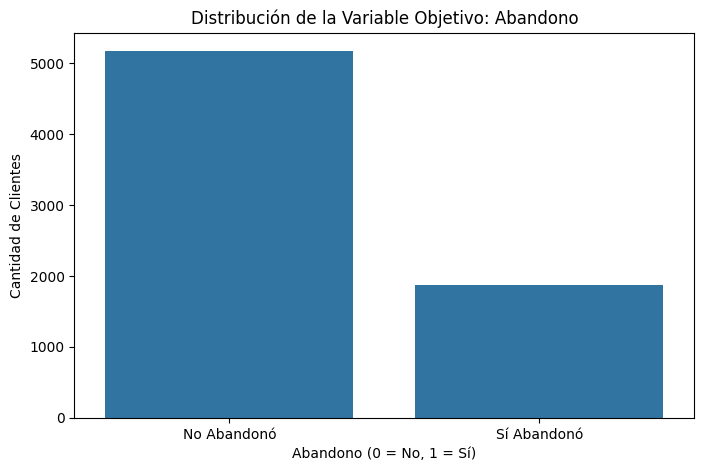

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='Abandono')
plt.title('Distribución de la Variable Objetivo: Abandono')
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])
plt.show()

### * Hay desbalance: 79% - 21%
### * No es extremo, pero requiere atención en la evaluación del modelo
### *  Objetivo: Maximizar el recall de la clase 1 (Abandono) → Queremos detectar la mayor cantidad posible de cancelaciones reales, aunque a costa de algunos falsos positivos.

###Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [51]:
#vamos a crear dos versiones, una sin  escalar para Decision Tree, Random Forest y XGBoost
#y otra para KNN, SVM, Regresión Logística y Redes Neuronales,

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Separar características y variable objetivo
# X = df_encoded.drop(columns=['Abandono'])
# y = df_encoded['Abandono']

# # Dividir datos
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Identificar columnas numéricas que necesitan escalamiento
# columnas_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']

# # Crear copia escalada solo si se necesita
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
# X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

## Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que todas las columnas sean numéricas (deben serlo tras one-hot)
df_numeric = df_encoded.select_dtypes(include=['number'])

# Mostrar las columnas numéricas
print("Columnas numéricas disponibles:")
print(df_numeric.columns.tolist())
print(df_numeric.dtypes)

Columnas numéricas disponibles:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
Abandono                         int64
Adulto_Mayor                     int64
Tiene_Pareja                     int64
Tiene_Dependientes               int64
Meses_Contrato                   int64
Servicio_Telefonico              int64
Multiples_Lineas                 int64
Seguridad_Online                 int64
Respaldo_Online                  i

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df_encoded.corr()

# Mostrar solo correlación con Abandono (ordenado por valor absoluto)
correlacion_con_abandono = correlation_matrix['Abandono'].sort_values(key=abs, ascending=False)

print("\nCorrelación con Abandono (ordenado por valor absoluto):")
print(correlacion_con_abandono)


Correlación con Abandono (ordenado por valor absoluto):
Abandono                       1.000000
Contrato_Mes a mes             0.405103
Meses_Contrato                -0.352229
Internet_Fibra Óptica          0.308020
Contrato_Dos años             -0.302253
Pago_Cheque electrónico        0.301919
Internet_Sin Internet         -0.227890
Cargo_Total                   -0.198324
Cargo_Diario                   0.193412
Cargo_Mensual                  0.193356
Factura_Electronica            0.191825
Contrato_Un año               -0.177820
Seguridad_Online              -0.171226
Soporte_Tecnico               -0.164674
Tiene_Dependientes            -0.164221
Adulto_Mayor                   0.150889
Tiene_Pareja                  -0.150448
Pago_Tarjeta de crédito       -0.134302
Internet_DSL                  -0.124214
Pago_Transferencia bancaria   -0.117937
Pago_Cheque por correo        -0.091683
Cantidad_Servicios            -0.087698
Respaldo_Online               -0.082255
Proteccion_Dispositivo 

* Las variables con mayor riesgo de abanadono (correlación positiva):
  * Contrato_Mes a mes: estos clientes pueden cancelar en cualquier momento, por ende genera una alta rotación. Se podrían ofrecer descuentos para migrar a contratos semestrales o anuales.
  * Internet_Fibra óptica: habrá que investigar los reclamos técnicos, la calidad de servicio y ofrecer un mejor soporte para retener a estos clientes.
  * Pago_Cheque electrónico: se entiende que el perfil del clientes es más volátil, también habría que auditar fallas en cobros y mejorar la comunicación de facturación.
  * Cargo_Diario y Cargo_Mensual van de la mano, se podría evaluar planes más económicos o con beneficios para clientes de alto costo.
  * Factura_Electrónica: puede indicar que el cliente digital cancela más fácil.

* Las variables con mayor retención (correlación negativa):
  * Meses_Contrato: cuanto más tiempo lleva el cliente, menos probable es que abandone.
  * Contrato_Dos años: similar a la lectura de la variable anterior.
  * Internet_Sin Internet: los clientes sin internet abandonan menos, no asumir que más servicios equivale a una mayor retención.
  * Seguridad_Online, Soporte_Tecnico, Tiene_Dependientes: promover paquetes con valor agregado.



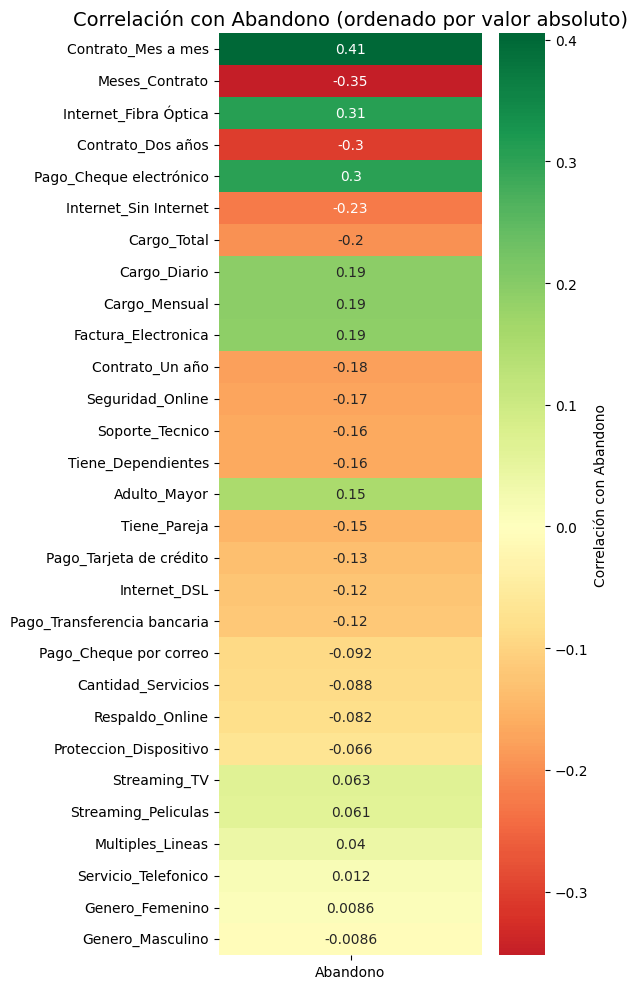

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo correlación con Abandono (sin repetir)
corr_abandono = df_encoded.corr()[['Abandono']].drop('Abandono')

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_abandono.sort_values(by='Abandono', key=abs, ascending=False),
    annot=True,
    cmap='RdYlGn', center=0,
    cbar_kws={"label": "Correlación con Abandono"}
)
plt.title('Correlación con Abandono (ordenado por valor absoluto)', fontsize=14)
plt.tight_layout()
plt.show()

Index(['Contrato_Mes a mes', 'Meses_Contrato', 'Internet_Fibra Óptica',
       'Contrato_Dos años', 'Pago_Cheque electrónico', 'Internet_Sin Internet',
       'Cargo_Total', 'Cargo_Diario', 'Cargo_Mensual', 'Factura_Electronica'],
      dtype='object')


/tmp/ipython-input-20757857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_values.values, y=top_corr_values.index, palette="vlag")


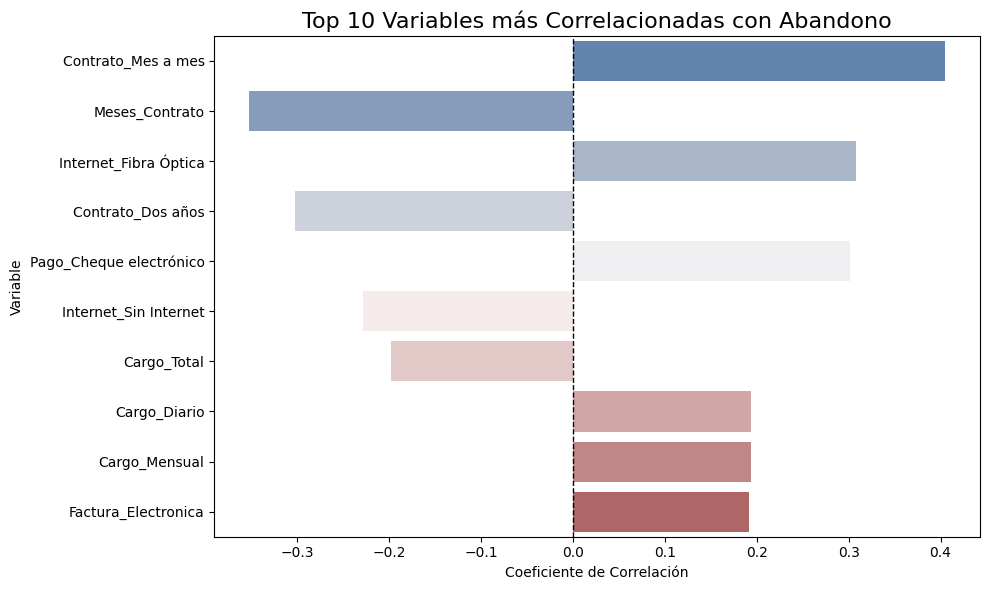

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 variables más correlacionadas con Abandono (en valor absoluto)
top_corr = correlacion_con_abandono.drop('Abandono').abs().sort_values(ascending=False).head(10)
top_corr_names = top_corr.index
print(top_corr_names)

# Obtener correlaciones reales (con signo)
top_corr_values = correlacion_con_abandono[top_corr_names]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_values.values, y=top_corr_values.index, palette="vlag")
plt.title('Top 10 Variables más Correlacionadas con Abandono', fontsize=16)
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

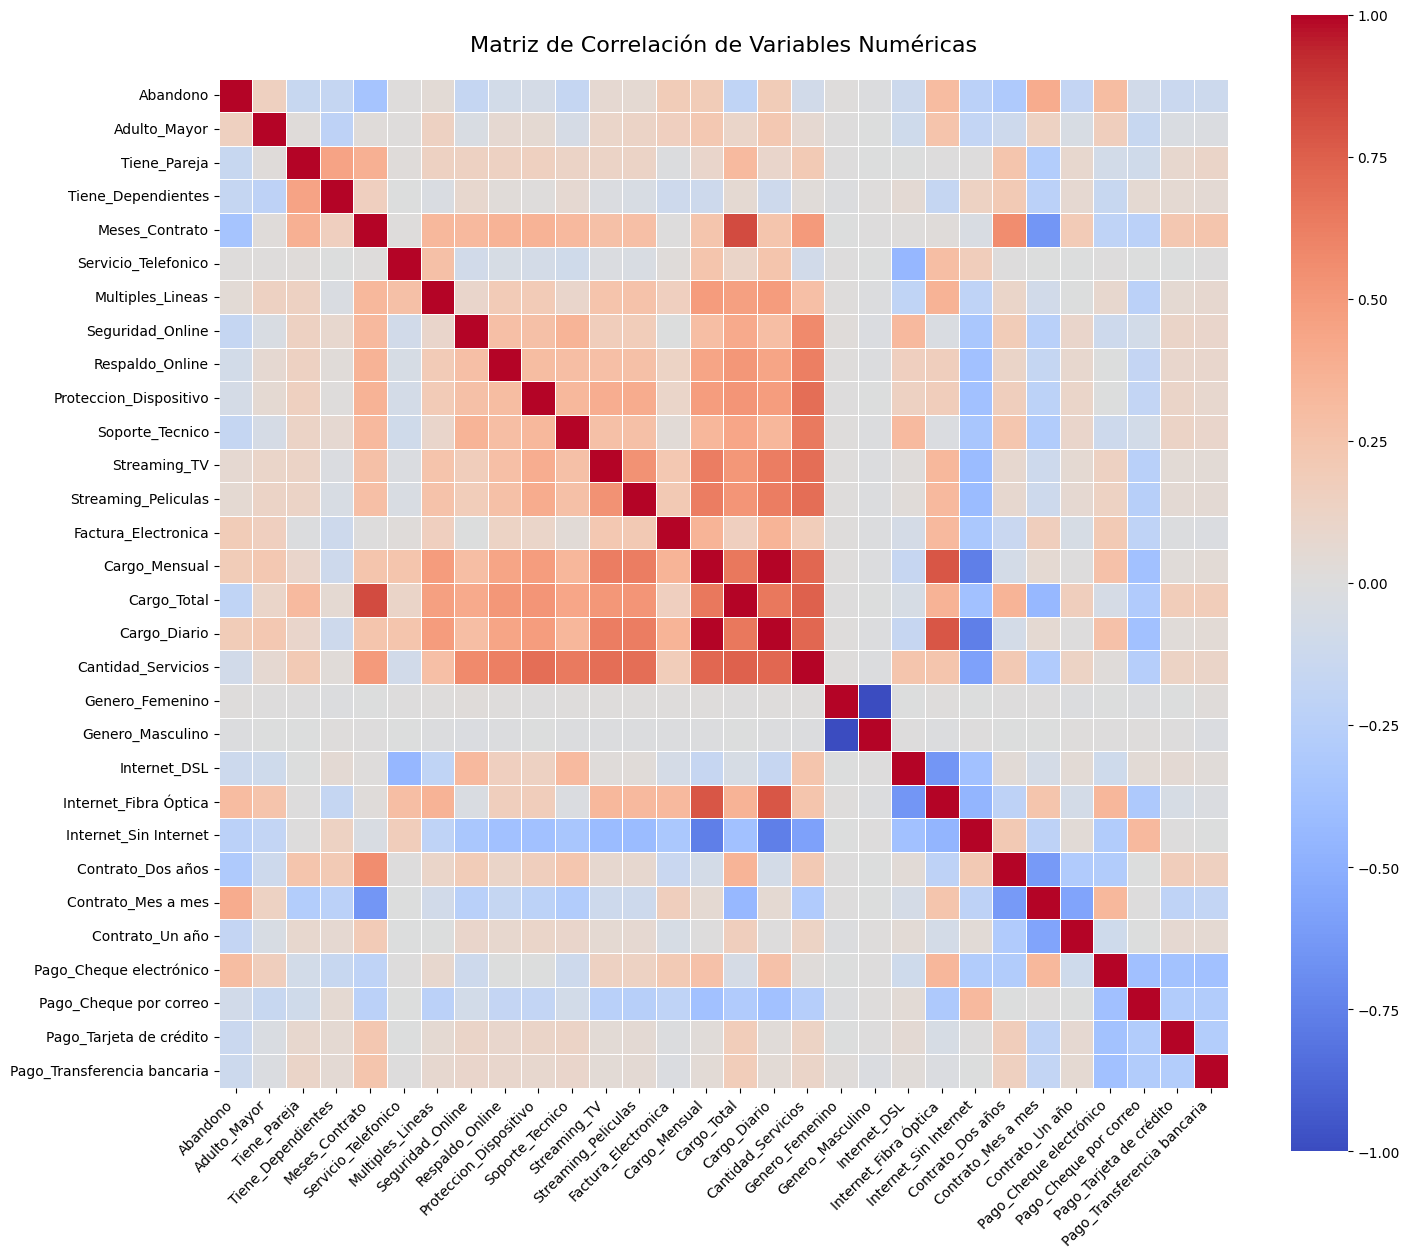

In [75]:
# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Tamaño del gráfico
plt.figure(figsize=(15, 13))

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=False,           # No mostrar números para no saturar
    cmap='coolwarm',       # Colores: rojo (+), azul (-), blanco (0)
    center=0,
    square=True,
    linewidths=0.5
)

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
# # Eliminar columnas problemáticas
# columnas_a_eliminar = ['Cargo_Total', 'Cargo_Diario']
# df_modelo = df_encoded.drop(columns=columnas_a_eliminar)

# # Verificar
# print("Columnas finales para modelado:")
# print(df_modelo.columns.tolist())

#No  los  eliminaremos aún dado el análisis dirigido de la  pregunta siguiente

###Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-493414390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Meses_Contrato', palette='Set2')


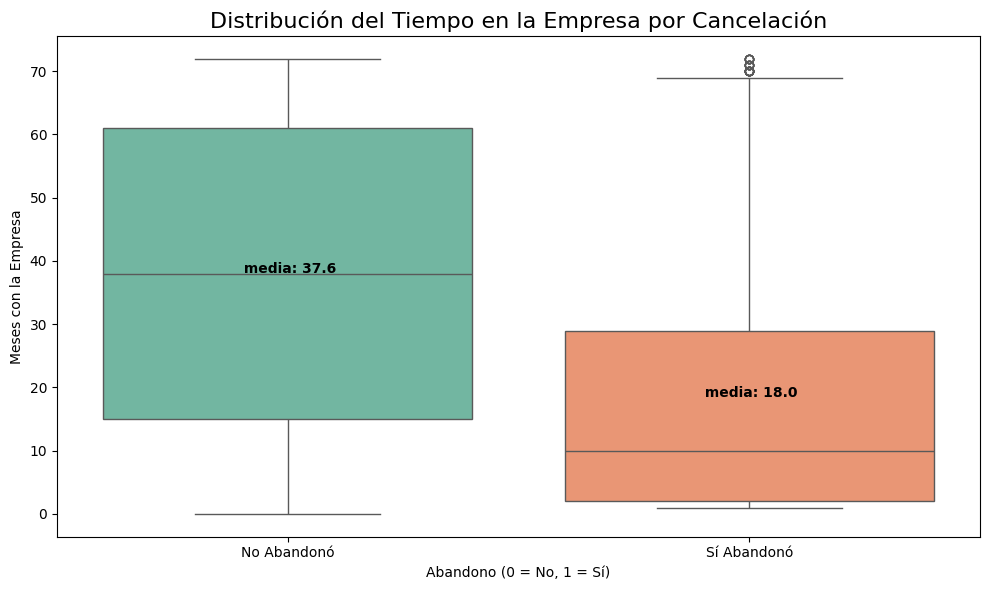

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Meses_Contrato', palette='Set2')

# Personalización
plt.title('Distribución del Tiempo en la Empresa por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Meses con la Empresa')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Meses_Contrato'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-148068336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Total', palette='Blues')


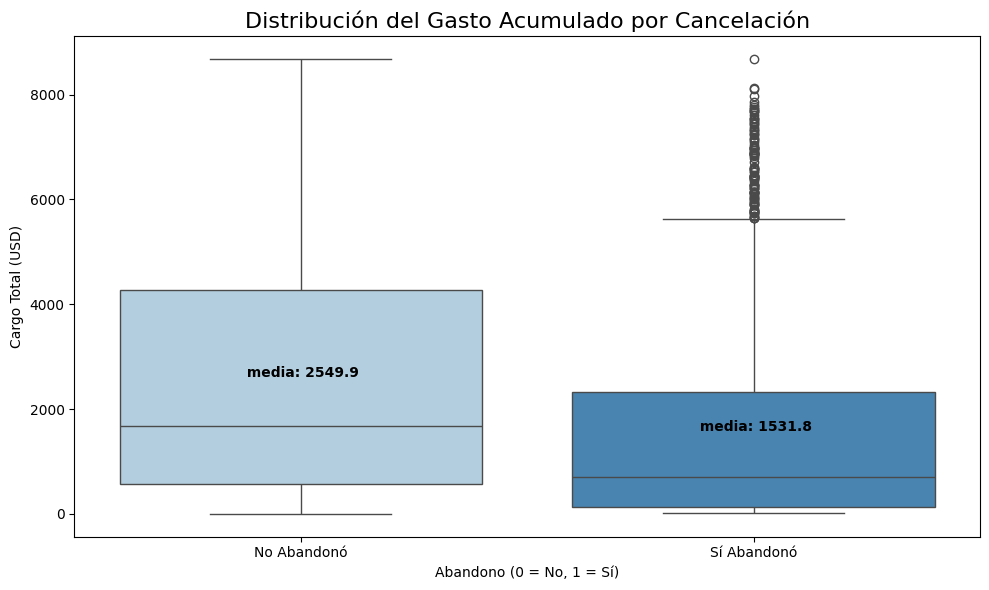

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Total', palette='Blues')

plt.title('Distribución del Gasto Acumulado por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cargo Total (USD)')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Cargo_Total'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2310029095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Mensual', palette='Oranges')


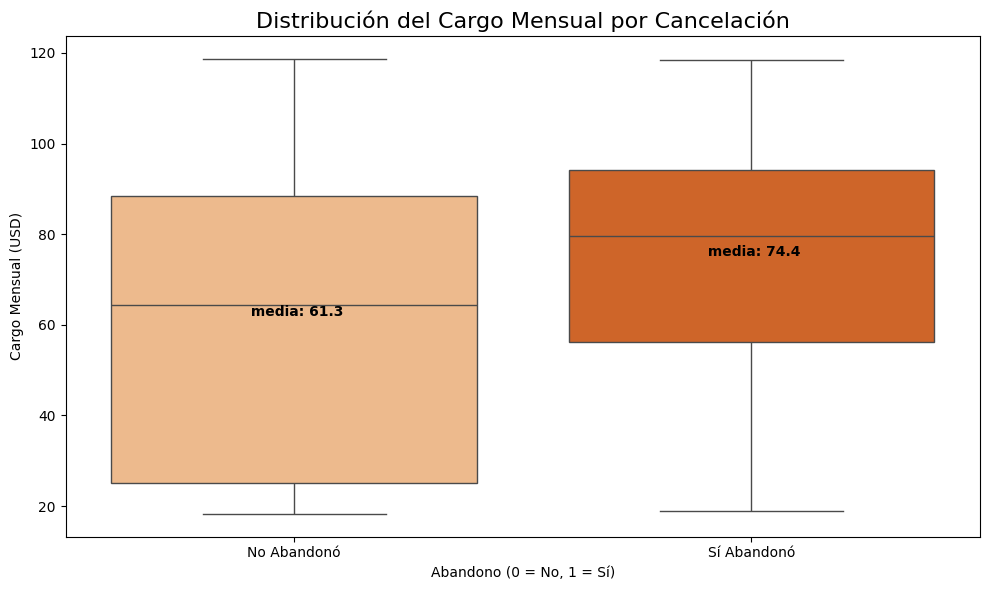

In [58]:
#dado que Cargo_Total  puede resultar engañoso, analizaremos el costo mensual
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Mensual', palette='Oranges')

plt.title('Distribución del Cargo Mensual por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cargo Mensual (USD)')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Cargo_Mensual'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

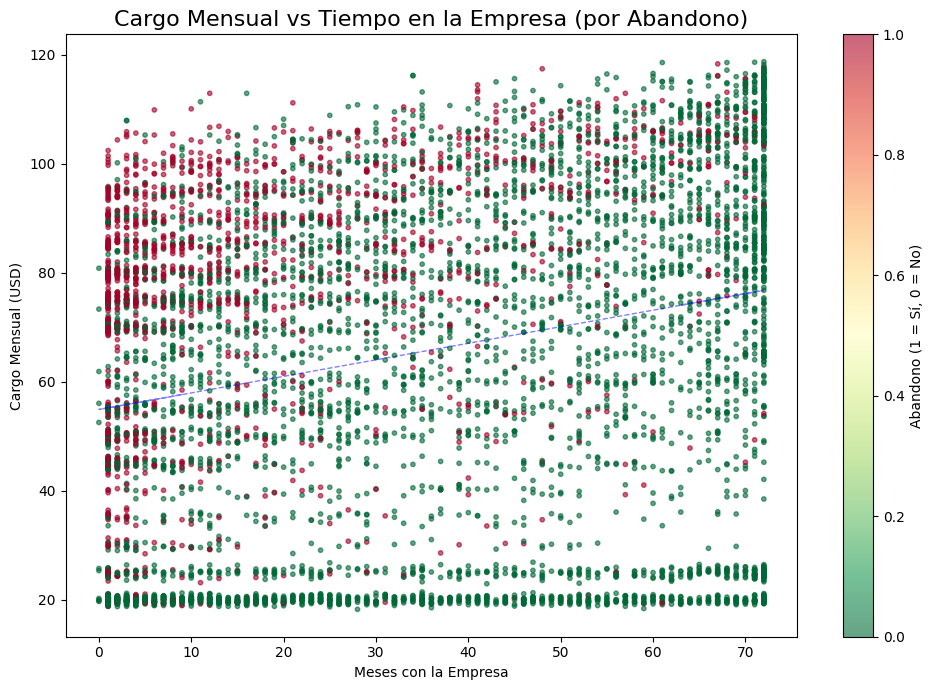

In [59]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_encoded['Meses_Contrato'],
    df_encoded['Cargo_Mensual'],
    c=df_encoded['Abandono'],
    cmap='RdYlGn_r',  # rojo = abandono, verde = no abandono
    alpha=0.6,
    s=10
)

plt.title('Cargo Mensual vs Tiempo en la Empresa (por Abandono)', fontsize=16)
plt.xlabel('Meses con la Empresa')
plt.ylabel('Cargo Mensual (USD)')
plt.colorbar(scatter, label='Abandono (1 = Sí, 0 = No)')

# Línea de tendencia suave (opcional)
import numpy as np
z = np.polyfit(df_encoded['Meses_Contrato'], df_encoded['Cargo_Mensual'], 1)
p = np.poly1d(z)
plt.plot(df_encoded['Meses_Contrato'], p(df_encoded['Meses_Contrato']), "b--", alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()